In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
num_classes = 10

In [4]:
batch_size = 128
epochs = 50

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
print(y_train.shape, y_test.shape)

(50000, 1) (10000, 1)


In [7]:
img_rows, img_cols = 32, 32

In [8]:
len(y_train)

50000

In [9]:
input_shape = (img_rows, img_cols, 3)

In [10]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)

In [11]:
#   Type convert and scale the test and training data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
#print(y_train[0:1])


x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


In [12]:
print(input_shape)

(32, 32, 3)


In [13]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
#print(y_train[0:1])   # verify one-hot encoding

In [14]:
print(x_test.shape,y_test.shape, y_train.shape,x_train.shape)

(10000, 32, 32, 3) (10000, 10) (50000, 10) (50000, 32, 32, 3)


In [15]:
model = Sequential()

In [16]:
model.add(Conv2D(32, kernel_size=(3, 3),
                  activation='relu',
                 padding='same',
                 strides=(1,1),
                  input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same',activation='relu',input_shape = ()))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1048832   
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
__________

In [18]:
#problem encounter -input_shape

In [19]:
#   Train the model and test/validate the mode with the test data after each cycle (epoch) through the training data
#   Return history of loss and accuracy for each epoch

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

#   Train the model and test/validate the mode with the test data after each cycle (epoch) through the training data
#   Return history of loss and accuracy for each epoch
hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 84s 2ms/step - loss: 1.5825 - acc: 0.4210 - val_loss: 1.2528 - val_acc: 0.5556
Epoch 2/50
50000/50000 [==============================] - 79s 2ms/step - loss: 1.1497 - acc: 0.5985 - val_loss: 0.9867 - val_acc: 0.6580
Epoch 3/50
50000/50000 [==============================] - 79s 2ms/step - loss: 0.9807 - acc: 0.6596 - val_loss: 1.0038 - val_acc: 0.6470
Epoch 4/50
50000/50000 [==============================] - 78s 2ms/step - loss: 0.8620 - acc: 0.7042 - val_loss: 0.8548 - val_acc: 0.7090
Epoch 5/50
50000/50000 [==============================] - 78s 2ms/step - loss: 0.7728 - acc: 0.7363 - val_loss: 0.8712 - val_acc: 0.7065
Epoch 6/50
50000/50000 [==============================] - 78s 2ms/step - loss: 0.6806 - acc: 0.7674 - val_loss: 0.8301 - val_acc: 0.7231
Epoch 7/50
50000/50000 [==============================] - 78s 2ms/step - loss: 0

Test loss: 2.293194534111023
Test accuracy: 0.7152


<Figure size 432x288 with 0 Axes>

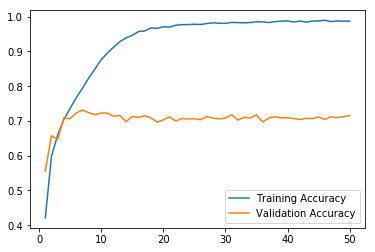

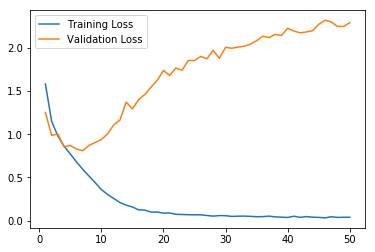

<Figure size 432x288 with 0 Axes>

In [20]:
#   Evaluate the model with the test data to get the scores on "real" data.
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#   Plot data to see relationships in training and validation data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
epoch_list = list(range(1, len(hist.history['acc']) + 1))  # values for x axis [1, 2, ..., # of epochs]
plt.plot(epoch_list, hist.history['acc'], epoch_list, hist.history['val_acc'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.figure()

epoch_list1 = list(range(1, len(hist.history['loss']) + 1))  # values for x axis [1, 2, ..., # of epochs]
plt.plot(epoch_list1, hist.history['loss'], epoch_list, hist.history['val_loss'])
plt.legend(('Training Loss', 'Validation Loss'))
plt.figure()


# Data Augmentation

### Augment the sample by changing the features of the picture
### Prevent Overfit

In [21]:
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [22]:
datagen = ImageDataGenerator(
            rotation_range = 40,width_shift_range = 0.2, height_shift_range = 0.2,
            shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, fill_mode = 'nearest')

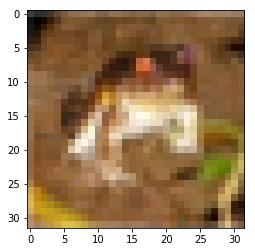

In [23]:
plt.imshow(x_train[0])

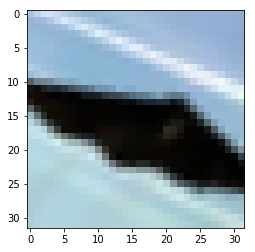

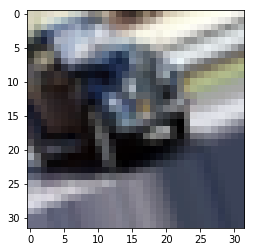

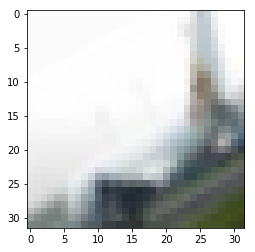

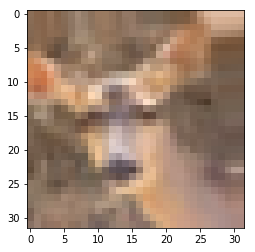

In [24]:
i = 0

for batch in datagen.flow(x_train, batch_size = 1):
    plt.figure()
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4 == 0:
        break
plt.show()

## Build up another model

In [25]:
model1 = Sequential()

model1.add(Conv2D(32, kernel_size=(3, 3),
                  activation='relu',
                 padding='same',
                 strides=(1,1),
                  input_shape=input_shape))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model1.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same',activation='relu',input_shape = ()))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())
model1.add(Dense(1024, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes, activation='softmax'))

model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              4195328   
_________________________________________________________________
dense_5 (Dense)              (None, 128)               131200    
__________

In [26]:
model1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

In [27]:
H = model1.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
    validation_data=(x_test, y_test), steps_per_epoch=len(x_train) // batch_size,
    epochs=epochs)

Epoch 1/50
390/390 [==============================] - 111s 285ms/step - loss: 1.8766 - acc: 0.3053 - val_loss: 1.4624 - val_acc: 0.4763
Epoch 2/50
390/390 [==============================] - 111s 284ms/step - loss: 1.6223 - acc: 0.4182 - val_loss: 1.2905 - val_acc: 0.5392
Epoch 3/50
390/390 [==============================] - 111s 284ms/step - loss: 1.5058 - acc: 0.4642 - val_loss: 1.3924 - val_acc: 0.5021
Epoch 4/50
390/390 [==============================] - 111s 284ms/step - loss: 1.4365 - acc: 0.4916 - val_loss: 1.2053 - val_acc: 0.5630
Epoch 5/50
390/390 [==============================] - 111s 284ms/step - loss: 1.3615 - acc: 0.5186 - val_loss: 1.2050 - val_acc: 0.5736
Epoch 6/50
390/390 [==============================] - 111s 284ms/step - loss: 1.3270 - acc: 0.5338 - val_loss: 1.1035 - val_acc: 0.6070
Epoch 7/50
390/390 [==============================] - 111s 284ms/step - loss: 1.2880 - acc: 0.5447 - val_loss: 1.0971 - val_acc: 0.6105
Epoch 8/50
390/390 [============================

Test loss: 2.293194534111023
Test accuracy: 0.7152


<Figure size 432x288 with 0 Axes>

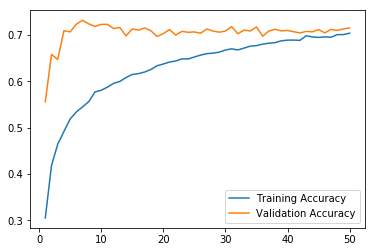

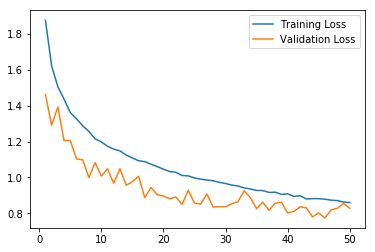

<Figure size 432x288 with 0 Axes>

In [28]:
#   Evaluate the model with the test data to get the scores on "real" data.
score1 = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#   Plot data to see relationships in training and validation data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
epoch_list1 = list(range(1, len(H.history['acc']) + 1))  # values for x axis [1, 2, ..., # of epochs]
plt.plot(epoch_list1, H.history['acc'], epoch_list, hist.history['val_acc'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.figure()

epoch_list1 = list(range(1, len(H.history['loss']) + 1))  # values for x axis [1, 2, ..., # of epochs]
plt.plot(epoch_list1, H.history['loss'], epoch_list1, H.history['val_loss'])
plt.legend(('Training Loss', 'Validation Loss'))
plt.figure()

# Pre-trained model - VGG 16

In [29]:
from keras.applications import VGG16

In [30]:
VGG_base = VGG16(weights='imagenet', include_top=False, input_shape = input_shape)
VGG_base.trainable = False

In [31]:
VGG_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

In [32]:
model2 = Sequential()

model2.add(VGG_base)
model2.add(Flatten())
model2.add(Dense(1024, activation='relu'))
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(num_classes, activation='softmax'))

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_8 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 15,769,930
Trainable params: 1,055,242
Non-trainable params: 14,714,688
________________________________________________________

In [33]:
model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

H2 = model2.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
    validation_data=(x_test, y_test), steps_per_epoch=len(x_train) // batch_size,
    epochs=3)

Epoch 1/3
390/390 [==============================] - 568s 1s/step - loss: 1.6263 - acc: 0.4189 - val_loss: 1.3631 - val_acc: 0.5134
Epoch 2/3
390/390 [==============================] - 560s 1s/step - loss: 1.4720 - acc: 0.4783 - val_loss: 1.3396 - val_acc: 0.5208
Epoch 3/3
390/390 [==============================] - 559s 1s/step - loss: 1.4231 - acc: 0.5008 - val_loss: 1.2464 - val_acc: 0.5607


# Prediction

In [34]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

In [56]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis = 1)

In [57]:
y_pred

array([3, 1, 8, ..., 5, 1, 7], dtype=int64)

In [61]:
max_y_test = np.argmax(y_test, axis = 1)
max_y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [39]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [62]:
print(classification_report(max_y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77      1000
           1       0.78      0.88      0.82      1000
           2       0.64      0.61      0.62      1000
           3       0.50      0.51      0.51      1000
           4       0.63      0.69      0.66      1000
           5       0.60      0.62      0.61      1000
           6       0.80      0.77      0.78      1000
           7       0.75      0.76      0.76      1000
           8       0.87      0.79      0.83      1000
           9       0.84      0.75      0.79      1000

   micro avg       0.72      0.72      0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



In [69]:
import seaborn as sns
conf_mat = confusion_matrix(max_y_test, y_pred)
conf_mat

array([[764,  32,  52,  22,  25,  13,   5,  14,  44,  29],
       [ 18, 880,   4,   7,   4,  10,   4,   5,  17,  51],
       [ 49,  10, 612,  65, 105,  65,  38,  37,  10,   9],
       [ 17,  16,  73, 507,  83, 180,  64,  37,  12,  11],
       [ 12,   5,  62,  66, 695,  36,  39,  75,   7,   3],
       [ 10,  12,  52, 171,  50, 623,  17,  49,   5,  11],
       [ 11,   2,  44,  79,  49,  36, 767,   4,   4,   4],
       [ 21,   6,  37,  40,  64,  56,   6, 763,   0,   7],
       [ 52,  56,  23,  21,  15,   6,   6,   7, 791,  23],
       [ 34, 115,   3,  27,  10,   8,   9,  21,  23, 750]], dtype=int64)

Text(0.5, 69.0, 'Predicted label')

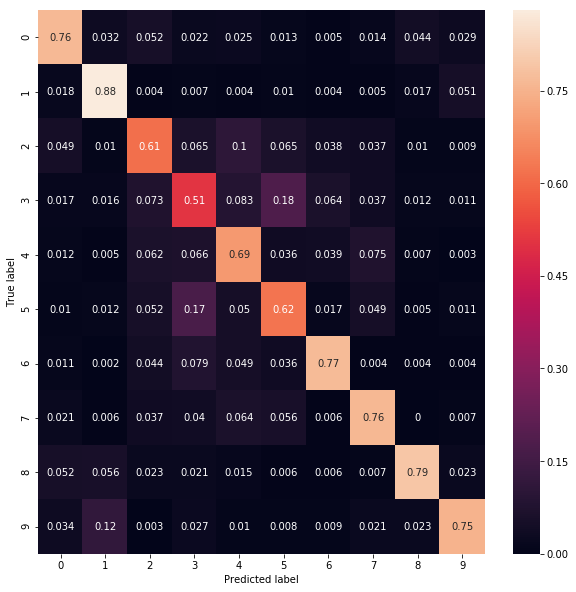

In [77]:
fig, ax = plt.subplots(figsize=(10,10))   

conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized, annot = True)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [85]:
def perf_measure(y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
           FP += 1
        if y_actual[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
           FN += 1

    print("TP:",TP,", FP:", FP, ", TN:", TN,", FN:",FN)

perf_measure(max_y_test,y_pred)

TP: 880 , FP: 254 , TN: 764 , FN: 224
